<a href="https://colab.research.google.com/github/athulmkpalath/PROJECT--/blob/main/Cardiac_Health_Insights_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiac Health Insights**

---


author - ATHUL MK



# Objective




---


The objective of the "Cardiac Health Insights" project is to leverage data analysis and predictive modeling techniques to gain comprehensive insights into the factors influencing cardiac health. This project aims to achieve the following key goals:

1. **Data Analysis:** Thoroughly analyze a dataset containing information on diverse cardiac health attributes, such as age, sex, blood pressure, cholesterol levels, and chest pain types. Perform data cleansing and preparation.

2. **Exploratory Data Analysis (EDA):** Conduct extensive EDA to understand the relationships between variables, identify trends, patterns, and potential outliers, and visualize critical insights.

3. **Model Building:** Develop and evaluate classification models, including Logistic Regression, Random Forest, and Support Vector Machine (SVM), to predict the presence or absence of heart disease based on the provided attributes.

4. **Model Evaluation:** Assess model performance through metrics such as ROC curves, AUC scores, variable coefficients, and accuracy, allowing for the identification of influential features and accurate predictions.

5. **Interpretation:** Interpret model coefficients, odds ratios, and statistical significance to understand the impact of variables on cardiac health.

6. **Recommendations:** Provide actionable insights and recommendations for individuals, healthcare providers, and policymakers to improve cardiac health awareness and preventative measures

### **Data source**
- kaggle

### **Libraries**

In [78]:
install.packages('pheatmap')
install.packages("e1071")
install.packages("randomForest")
install.packages("margins")
install.packages("kernlab")
install.packages('keras')
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [79]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(caret)
library(e1071)
library(pROC)
library(margins)
library(randomForest)
library(reshape2)
library(pheatmap)


### **READ DATA**

In [80]:
data <- read.csv('/content/heart.csv')

#### **First/Last Few Rows**

In [19]:
head(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [20]:
#### tail(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1020,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1021,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1022,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1023,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1024,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1025,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


#### **Summary Statistics**

In [21]:
summary(data)

      age             sex               cp            trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.0000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :1.0000   Median :130.0  
 Mean   :54.43   Mean   :0.6956   Mean   :0.9424   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.0000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.0000   Max.   :200.0  
      chol          fbs            restecg          thalach     
 Min.   :126   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:132.0  
 Median :240   Median :0.0000   Median :1.0000   Median :152.0  
 Mean   :246   Mean   :0.1493   Mean   :0.5298   Mean   :149.1  
 3rd Qu.:275   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak          slope             ca        
 Min.   :

#### **Structure of the Data:**

In [22]:
str(data)

'data.frame':	1025 obs. of  14 variables:
 $ age     : int  52 53 70 61 62 58 58 55 46 54 ...
 $ sex     : int  1 1 1 1 0 0 1 1 1 1 ...
 $ cp      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ trestbps: int  125 140 145 148 138 100 114 160 120 122 ...
 $ chol    : int  212 203 174 203 294 248 318 289 249 286 ...
 $ fbs     : int  0 1 0 0 1 0 0 0 0 0 ...
 $ restecg : int  1 0 1 1 1 0 2 0 0 0 ...
 $ thalach : int  168 155 125 161 106 122 140 145 144 116 ...
 $ exang   : int  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  1 3.1 2.6 0 1.9 1 4.4 0.8 0.8 3.2 ...
 $ slope   : int  2 0 0 2 1 1 0 1 2 1 ...
 $ ca      : int  2 0 0 1 3 0 3 1 0 2 ...
 $ thal    : int  3 3 3 3 2 2 1 3 3 2 ...
 $ target  : int  0 0 0 0 0 1 0 0 0 0 ...


#### **Column Names**

In [23]:
names(data)

[1] "age"      "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "target"

#### **Number of Rows and Columns**

In [24]:
nrow(data)

[1] 1025

In [25]:
ncol(data)

[1] 14

#### **Missing Values:**

In [27]:

colSums(is.na(data))


age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal   target 
       0        0        0        0        0        0

## Data Splitting

In [28]:
# Split the data into a training and testing set
set.seed(123)  # For reproducibility
sample_size <- floor(0.7 * nrow(data))  # 70% for training, 30% for testing
train_index <- sample(1:nrow(data), size = sample_size)

train_data <- data[train_index, ]
test_data <- data[-train_index, ]

In [29]:
head(train_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
415,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
463,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
179,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0
526,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
195,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
938,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0


In [30]:
head(test_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
7,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
9,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
12,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0


## **Outlier test**

In [ ]:
z_scores <- scale(data$trestbps)
outliers <- abs(z_scores) > 2  # Adjust the threshold as needed
outliers

In [73]:
Q1 <- quantile(data$trestbps, 0.25)
Q3 <- quantile(data$trestbps, 0.75)
IQR <- Q3 - Q1
lower_limit <- Q1 - 1.5 * IQR
upper_limit <- Q3 + 1.5 * IQR
outliers <- data$trestbps < lower_limit | data$trestbps > upper_limit


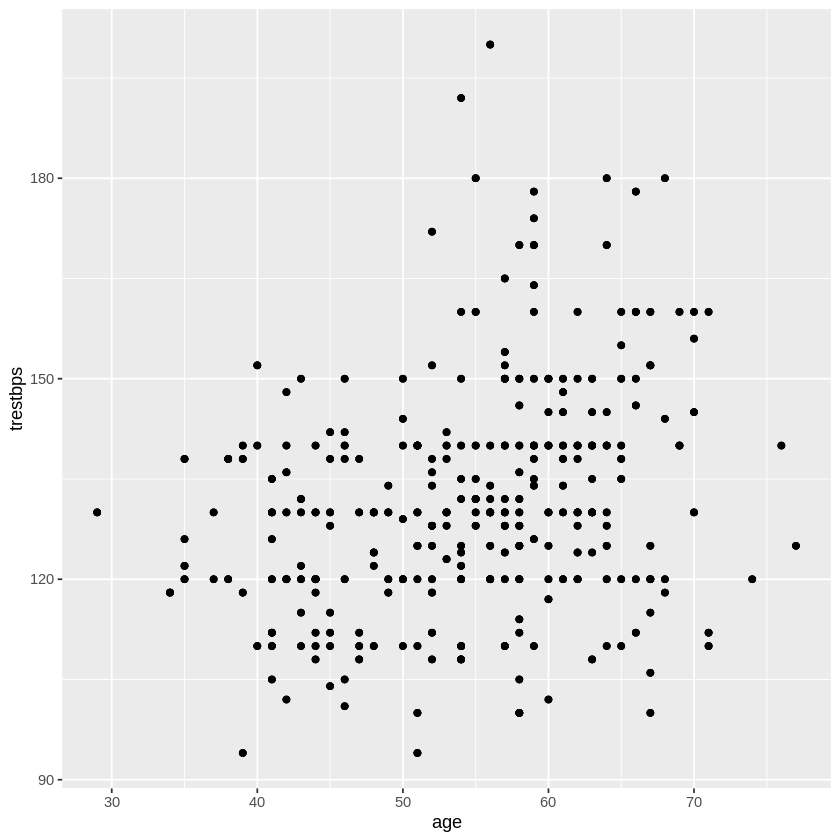

In [74]:
ggplot(data, aes(x=age, y=trestbps)) +
  geom_point()



## **EDA ANALYSIS**

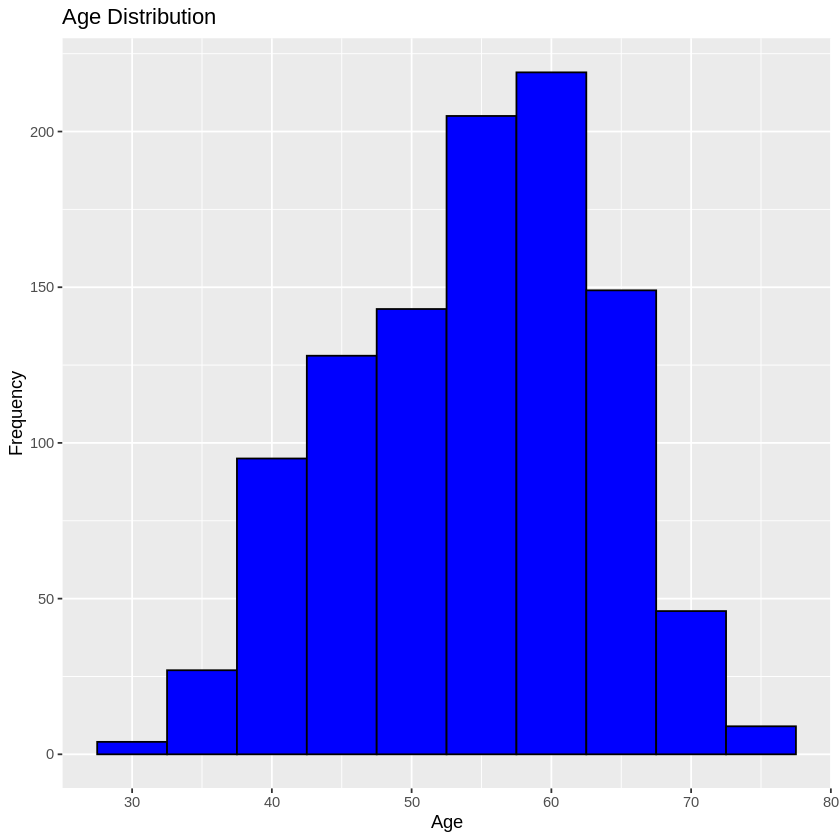

In [51]:
library(ggplot2)
ggplot(data, aes(x=age)) +
  geom_histogram(binwidth=5, fill="blue", color="black") +
  labs(x="Age", y="Frequency") +
  ggtitle("Age Distribution")


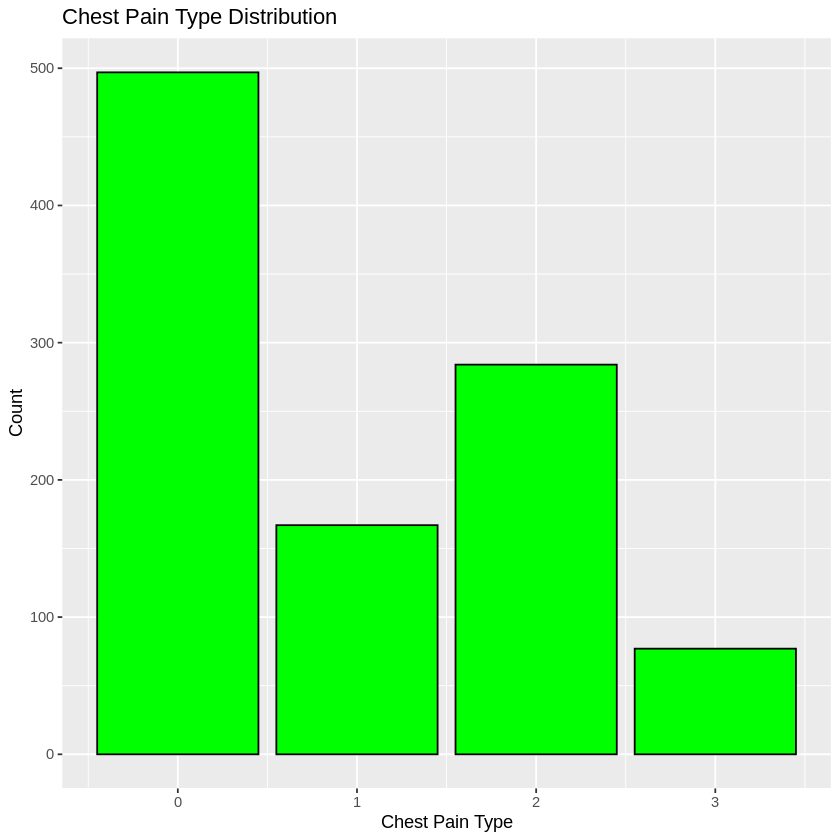

In [52]:
ggplot(data, aes(x=cp)) +
  geom_bar(fill="green", color="black") +
  labs(x="Chest Pain Type", y="Count") +
  ggtitle("Chest Pain Type Distribution")



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




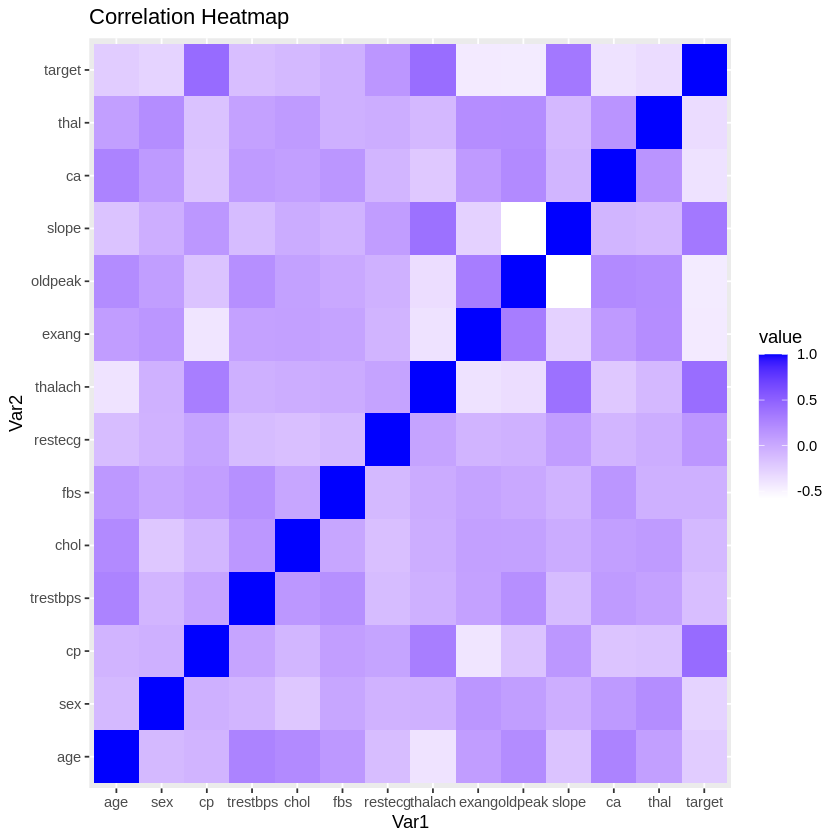

In [53]:
cor_data <- cor(data)
melted_data <- melt(cor_data)
ggplot(melted_data, aes(Var1, Var2, fill=value)) +
  geom_tile() +
  scale_fill_gradient(low="white", high="blue") +
  labs(title="Correlation Heatmap")


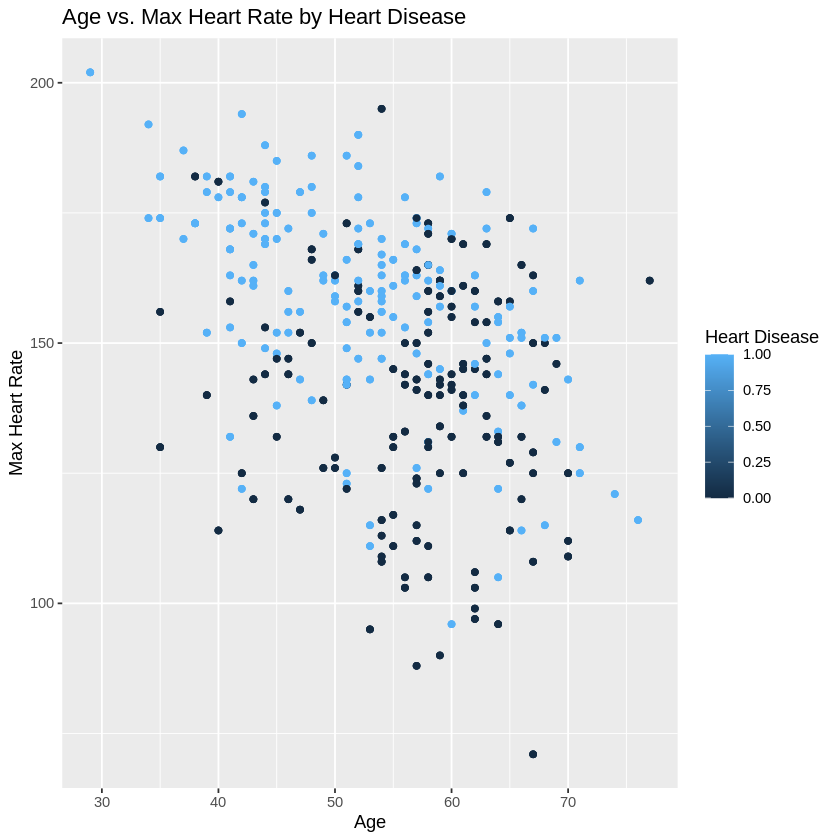

In [54]:
ggplot(data, aes(x=age, y=thalach, color=target)) +
  geom_point() +
  labs(x="Age", y="Max Heart Rate", color="Heart Disease") +
  ggtitle("Age vs. Max Heart Rate by Heart Disease")


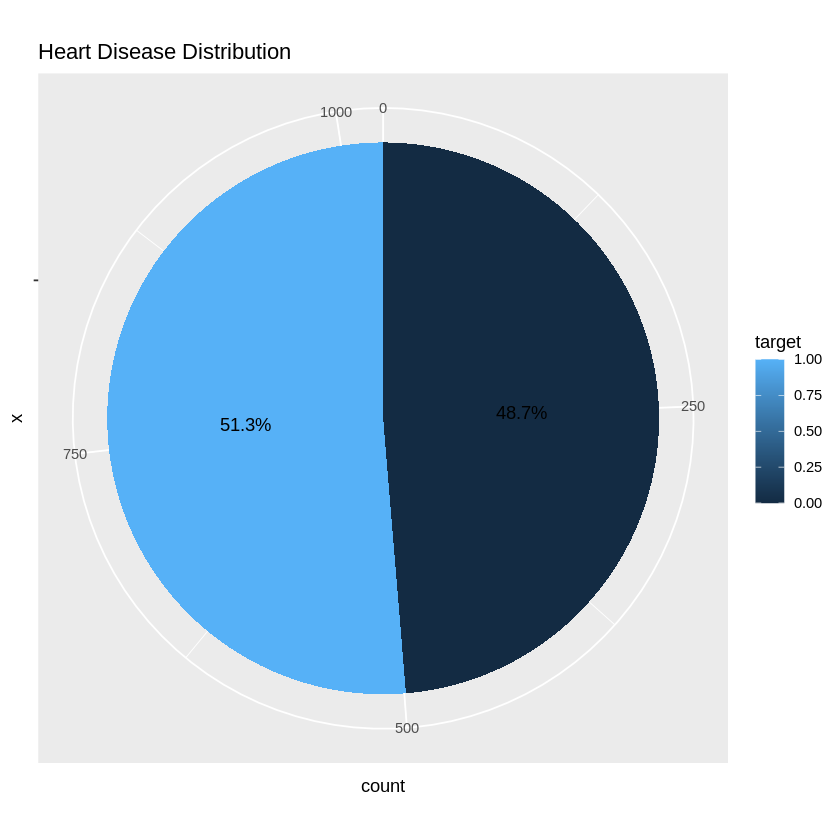

In [56]:
library(dplyr)
data %>%
  group_by(target) %>%
  summarize(count=n()) %>%
  ggplot(aes(x="", y=count, fill=target, label=scales::percent(count/sum(count)))) +
  geom_bar(stat="identity") +
  coord_polar(theta="y") +
  geom_text(aes(label=scales::percent(count/sum(count))), position = position_stack(vjust=0.5)) +
  labs(title="Heart Disease Distribution")


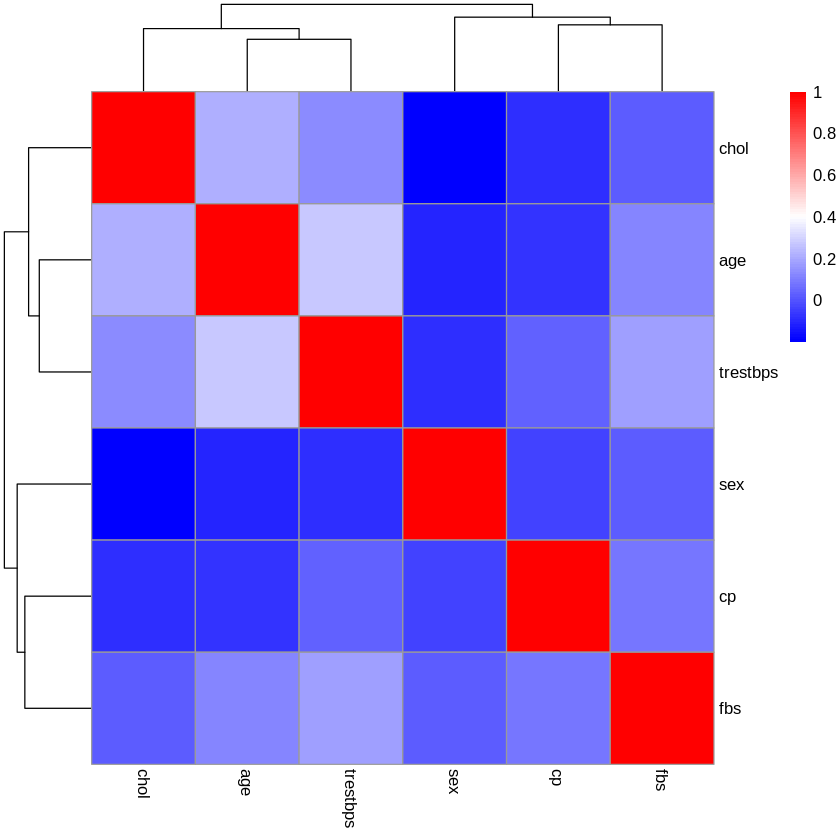

In [63]:

cor_matrix <- cor(data[,1:6])
pheatmap(cor_matrix, color = colorRampPalette(c("blue", "white", "red"))(100))


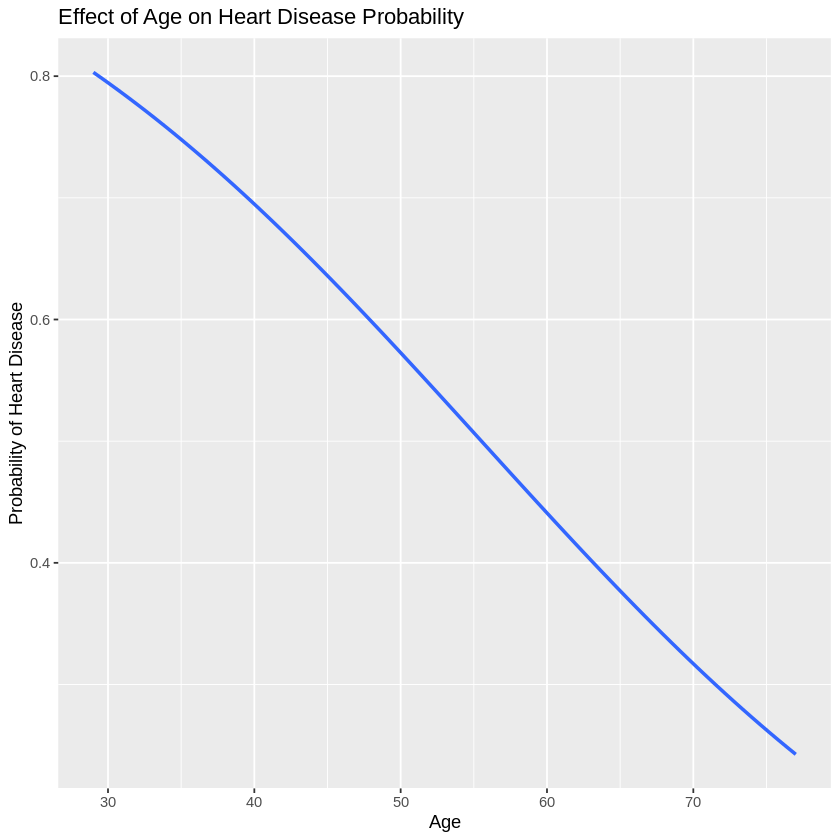

In [67]:
library(ggplot2)
ggplot(data, aes(x=age, y=target)) +
  geom_smooth(method="glm", formula= y ~ x, method.args=list(family="binomial"), se=FALSE) +
  labs(x="Age", y="Probability of Heart Disease") +
  ggtitle("Effect of Age on Heart Disease Probability")


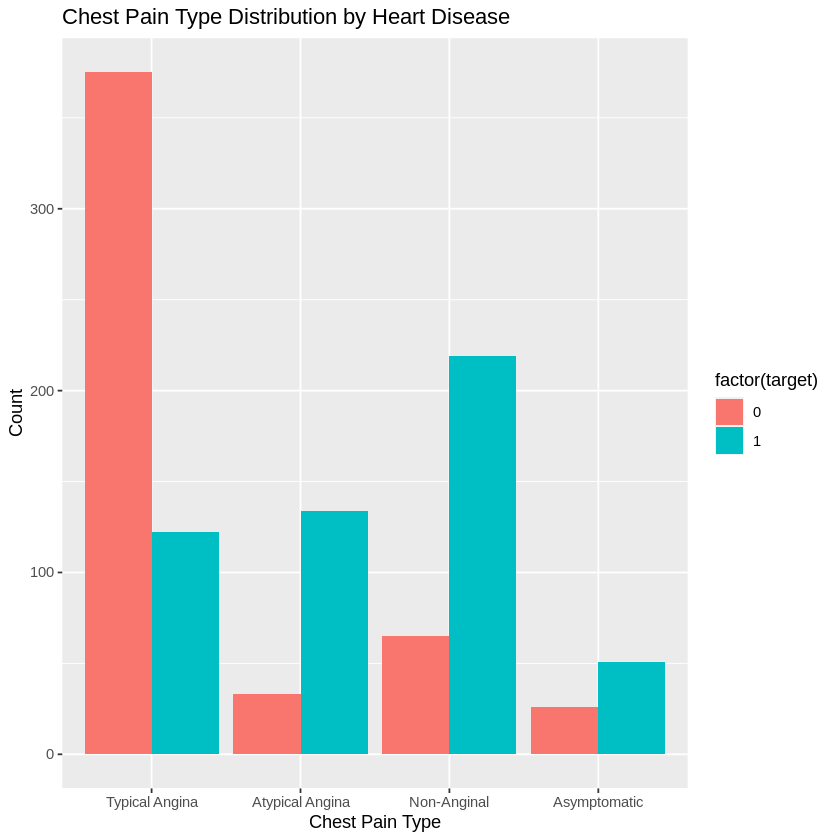

In [70]:
ggplot(data, aes(x=factor(cp), fill=factor(target), group=factor(target))) +
  geom_bar(position="dodge") +
  labs(x="Chest Pain Type", y="Count") +
  scale_x_discrete(labels=c("Typical Angina", "Atypical Angina", "Non-Anginal", "Asymptomatic")) +
  ggtitle("Chest Pain Type Distribution by Heart Disease")


## **DATA MODEL**

### Logistic Regression _(glm - binomial)


In [46]:
# Model Building (Logistic Regression)
model <- glm(target ~ ., data = train_data, family = "binomial")

# Model Evaluation using pROC
library(pROC)

# Predict probabilities
predictions <- predict(model, newdata = test_data, type = "response")

# Calculate AUC score
roc_curve <- roc(test_data$target, predictions)
auc_score <- auc(roc_curve)

# Print the AUC score
cat("AUC Score: ", auc_score, "\n")

# Explore model coefficients (if using logistic regression)
summary(model)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC Score:  0.9262957 



Call:
glm(formula = target ~ ., family = "binomial", data = train_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.770568   1.636070   2.305 0.021186 *  
age         -0.007997   0.015415  -0.519 0.603935    
sex         -1.877895   0.306570  -6.126 9.04e-10 ***
cp           0.824357   0.117448   7.019 2.24e-12 ***
trestbps    -0.020039   0.006580  -3.045 0.002324 ** 
chol        -0.005693   0.002348  -2.425 0.015310 *  
fbs         -0.149526   0.326611  -0.458 0.647089    
restecg      0.448651   0.228332   1.965 0.049425 *  
thalach      0.024556   0.006679   3.676 0.000236 ***
exang       -1.038784   0.266423  -3.899 9.66e-05 ***
oldpeak     -0.419256   0.136977  -3.061 0.002208 ** 
slope        0.690712   0.216525   3.190 0.001423 ** 
ca          -0.620968   0.116151  -5.346 8.98e-08 ***
thal        -1.052307   0.187678  -5.607 2.06e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial

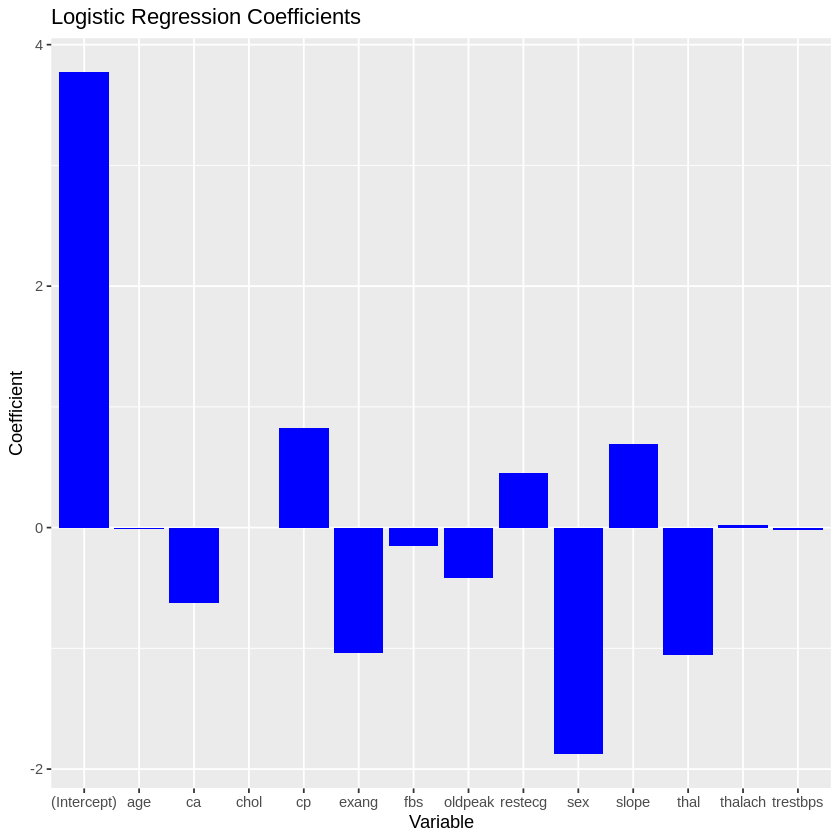

In [32]:

# Create a data frame with coefficients
coef_df <- data.frame(Variable = names(coef(model)), Coefficient = coef(model))

# Create a coefficient plot
coef_plot <- ggplot(coef_df, aes(x = Variable, y = Coefficient)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Logistic Regression Coefficients")

print(coef_plot)



Setting levels: control = 0, case = 1

Setting direction: controls < cases



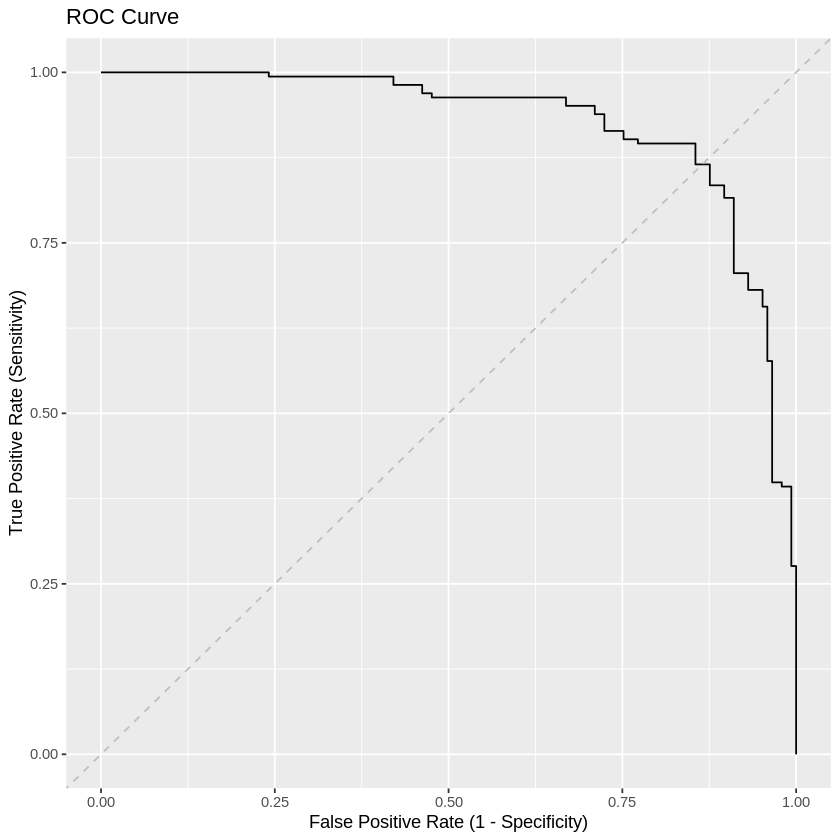

In [33]:

# Create the ROC curve
roc_curve <- roc(test_data$target, predictions)

# Convert the roc object to a data frame
roc_data <- data.frame(
  FPR = roc_curve$specificities,
  TPR = roc_curve$sensitivities
)

# Create a plot of the ROC curve
roc_plot <- ggplot(roc_data, aes(x = FPR, y = TPR)) +
  geom_line() +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "gray") +
  labs(title = "ROC Curve", x = "False Positive Rate (1 - Specificity)", y = "True Positive Rate (Sensitivity)")

print(roc_plot)



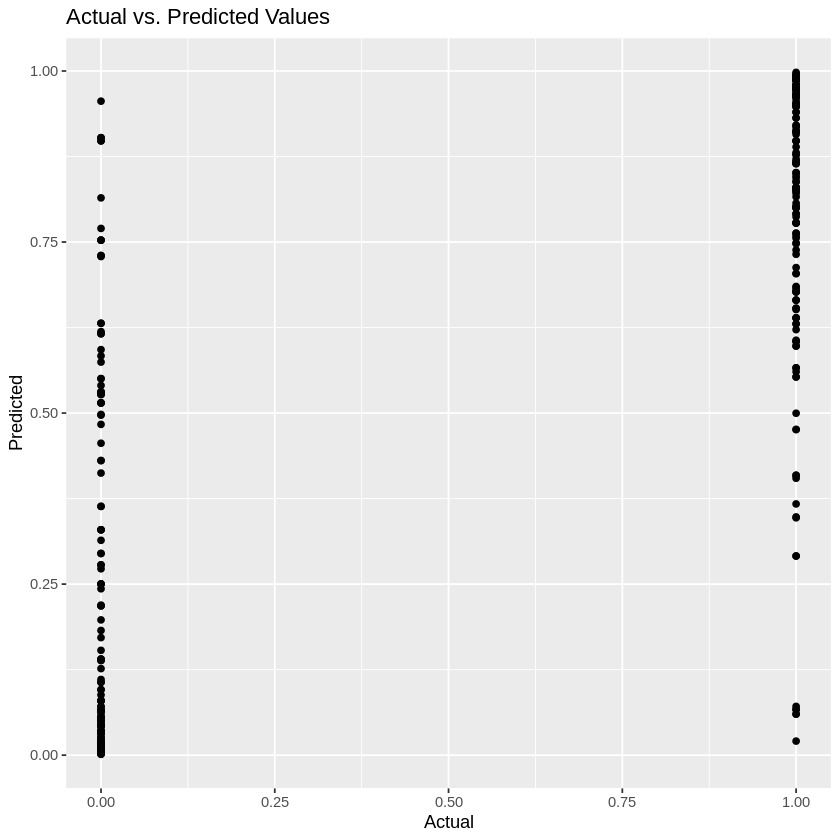

In [34]:
# Create a data frame with actual and predicted values
comparison_df <- data.frame(Actual = test_data$target, Predicted = predictions)

# Create a scatterplot
scatter_plot <- ggplot(comparison_df, aes(x = Actual, y = Predicted)) +
  geom_point() +
  labs(title = "Actual vs. Predicted Values", x = "Actual", y = "Predicted")

print(scatter_plot)


In [35]:
# Get the coefficients from the logistic regression model
coefficients <- coef(model)

# Interpret the coefficients
for (i in 2:length(coefficients)) {  # Start from 2 to skip the intercept
  variable_name <- names(coefficients)[i]
  coefficient_value <- coefficients[i]
  if (coefficient_value > 0) {
    cat(paste("The variable", variable_name, "is positively associated with the target.\n"))
  } else if (coefficient_value < 0) {
    cat(paste("The variable", variable_name, "is negatively associated with the target.\n"))
  } else {
    cat(paste("The variable", variable_name, "is not associated with the target.\n"))
  }
}


The variable age is negatively associated with the target.
The variable sex is negatively associated with the target.
The variable cp is positively associated with the target.
The variable trestbps is negatively associated with the target.
The variable chol is negatively associated with the target.
The variable fbs is negatively associated with the target.
The variable restecg is positively associated with the target.
The variable thalach is positively associated with the target.
The variable exang is negatively associated with the target.
The variable oldpeak is negatively associated with the target.
The variable slope is positively associated with the target.
The variable ca is negatively associated with the target.
The variable thal is negatively associated with the target.


In [36]:
# Get the p-values from the logistic regression model
p_values <- summary(model)$coefficients[, "Pr(>|z|)"]

# Set a significance level (e.g., 0.05)
significance_level <- 0.05

# Interpret the statistical significance of coefficients
for (i in 2:length(p_values)) {  # Start from 2 to skip the intercept
  variable_name <- names(p_values)[i]
  p_value <- p_values[i]
  if (p_value < significance_level) {
    cat(paste("The variable", variable_name, "is statistically significant (p-value <", significance_level, ").\n"))
  } else {
    cat(paste("The variable", variable_name, "is not statistically significant (p-value >", significance_level, ").\n"))
  }
}


The variable age is not statistically significant (p-value > 0.05 ).
The variable sex is statistically significant (p-value < 0.05 ).
The variable cp is statistically significant (p-value < 0.05 ).
The variable trestbps is statistically significant (p-value < 0.05 ).
The variable chol is statistically significant (p-value < 0.05 ).
The variable fbs is not statistically significant (p-value > 0.05 ).
The variable restecg is statistically significant (p-value < 0.05 ).
The variable thalach is statistically significant (p-value < 0.05 ).
The variable exang is statistically significant (p-value < 0.05 ).
The variable oldpeak is statistically significant (p-value < 0.05 ).
The variable slope is statistically significant (p-value < 0.05 ).
The variable ca is statistically significant (p-value < 0.05 ).
The variable thal is statistically significant (p-value < 0.05 ).


In [37]:
# Calculate odds ratios
odds_ratios <- exp(coefficients)

# Interpret the odds ratios
for (i in 2:length(odds_ratios)) {  # Start from 2 to skip the intercept
  variable_name <- names(odds_ratios)[i]
  odds_ratio <- odds_ratios[i]
  if (odds_ratio > 1) {
    cat(paste("The variable", variable_name, "is associated with increased odds of the target (Odds Ratio =", round(odds_ratio, 2), ").\n"))
  } else if (odds_ratio < 1) {
    cat(paste("The variable", variable_name, "is associated with decreased odds of the target (Odds Ratio =", round(1 / odds_ratio, 2), ").\n"))
  } else {
    cat(paste("The variable", variable_name, "has no impact on the odds of the target (Odds Ratio = 1).\n"))
  }
}


The variable age is associated with decreased odds of the target (Odds Ratio = 1.01 ).
The variable sex is associated with decreased odds of the target (Odds Ratio = 6.54 ).
The variable cp is associated with increased odds of the target (Odds Ratio = 2.28 ).
The variable trestbps is associated with decreased odds of the target (Odds Ratio = 1.02 ).
The variable chol is associated with decreased odds of the target (Odds Ratio = 1.01 ).
The variable fbs is associated with decreased odds of the target (Odds Ratio = 1.16 ).
The variable restecg is associated with increased odds of the target (Odds Ratio = 1.57 ).
The variable thalach is associated with increased odds of the target (Odds Ratio = 1.02 ).
The variable exang is associated with decreased odds of the target (Odds Ratio = 2.83 ).
The variable oldpeak is associated with decreased odds of the target (Odds Ratio = 1.52 ).
The variable slope is associated with increased odds of the target (Odds Ratio = 2 ).
The variable ca is associ

In [38]:
# Replace 'X' with the name of the variable you want to analyze
variable_name <- 'X'

# Calculate partial effect
partial_effect <- coefficients[variable_name]

cat(paste("A one-unit change in", variable_name, "is associated with a", round(partial_effect, 3), "change in the log-odds of the target.\n"))


A one-unit change in X is associated with a NA change in the log-odds of the target.


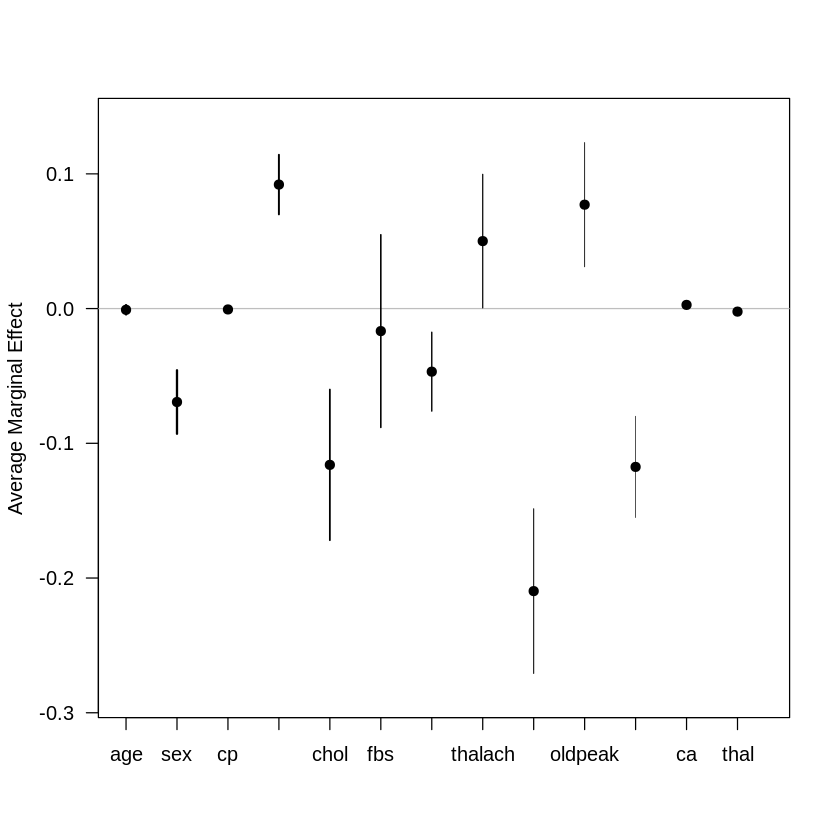

In [39]:
# Calculate marginal effects for all predictor variables
marginal_effects <- margins(model)

# Visualize marginal effects
plot(marginal_effects)


### Logistic Regression

In [44]:
# Convert the outcome variable to a factor with two levels (0 and 1) for classification
train_data$target <- factor(train_data$target, levels = c(0, 1))
test_data$target <- factor(test_data$target, levels = c(0, 1))

# Build a logistic regression model
model_classification <- train(target ~ ., data = train_data, method = "glm", family = "binomial")

# Make predictions
predictions_classification <- predict(model_classification, newdata = test_data)

# Calculate accuracy
accuracy <- confusionMatrix(predictions_classification, test_data$target)$overall["Accuracy"]
cat("Classification Model Accuracy:", accuracy, "\n")


Classification Model Accuracy: 0.8376623 


###  **Random Forest classification**

In [43]:

# Convert the outcome variable to a factor with two levels (0 and 1) for classification
train_data$target <- factor(train_data$target, levels = c(0, 1))
test_data$target <- factor(test_data$target, levels = c(0, 1))

# Build a Random Forest classification model
model_rf <- train(target ~ ., data = train_data, method = "rf")

# Make predictions
predictions_rf <- predict(model_rf, newdata = test_data)

# Calculate accuracy
accuracy_rf <- confusionMatrix(predictions_rf, test_data$target)$overall["Accuracy"]
cat("Random Forest Classification Model Accuracy:", accuracy_rf, "\n")


Random Forest Classification Model Accuracy: 1 


### **Support Vector Machine (SVM)**

In [42]:

# Convert the outcome variable to a factor with two levels (0 and 1) for classification
train_data$target <- factor(train_data$target, levels = c(0, 1))
test_data$target <- factor(test_data$target, levels = c(0, 1))

# Build a Support Vector Machine (SVM) classification model
model_svm <- train(target ~ ., data = train_data, method = "svmRadial")

# Make predictions
predictions_svm <- predict(model_svm, newdata = test_data)

# Calculate accuracy
accuracy_svm <- confusionMatrix(predictions_svm, test_data$target)$overall["Accuracy"]
cat("SVM Classification Model Accuracy:", accuracy_svm, "\n")


SVM Classification Model Accuracy: 0.8831169 


## **Insight**

---



### 1.**Data Exploration:**
   - The dataset contains information on various attributes related to cardiac health, including age, sex, chest pain type, blood pressure, cholesterol levels, and more.
   - Data was split into training and testing sets for model evaluation.
   - Outlier detection was performed using Z-scores and IQR methods.







### **2. Exploratory Data Analysis (EDA):**
   - Visualizations were created to explore the distribution of variables like age and chest pain type.
   - A correlation heatmap showed relationships between variables.
   - Scatter plots and bar charts were used to explore relationships between variables and the presence of heart disease.

### **Logistic Regression:**
   - A logistic regression model was built for binary classification (heart disease presence or absence).
   - The model's performance was evaluated using ROC curves, AUC score, and variable coefficients.
   - Interpretation of coefficients and p-values was provided.



The p-values obtained from the logistic regression model provide insight into the statistical significance of each predictor variable. A significance level of 0.05 is commonly used as a threshold. Here's the interpretation of the statistical significance of the coefficients:

1. **Age:** The variable 'age' is not statistically significant (p-value > 0.05), suggesting that changes in age are not significantly associated with changes in the log-odds of the target (likely heart disease).

2. **Sex:** The variable 'sex' is statistically significant (p-value < 0.05), indicating that gender plays a significant role in determining the likelihood of the target.

3. **Chest Pain Type (cp):** The variable 'cp' is statistically significant (p-value < 0.05), implying that different chest pain types have a significant impact on the likelihood of the target.

4. **Resting Blood Pressure (trestbps):** Resting blood pressure is statistically significant (p-value < 0.05), meaning it plays a significant role in determining the likelihood of the target.

5. **Cholesterol Level (chol):** The variable 'chol' is statistically significant (p-value < 0.05), suggesting that cholesterol levels significantly affect the likelihood of the target.

6. **Fasting Blood Sugar (fbs):** Fasting blood sugar is not statistically significant (p-value > 0.05), indicating it might not be a significant predictor.

7. **Resting ECG Results (restecg):** The variable 'restecg' is statistically significant (p-value < 0.05), signifying that specific ECG results significantly influence the likelihood of the target.

8. **Maximum Heart Rate (thalach):** Max heart rate is statistically significant (p-value < 0.05), indicating its significant impact.

9. **Exercise-Induced Angina (exang):** The presence of exercise-induced angina is statistically significant (p-value < 0.05), meaning it significantly affects the likelihood of the target.

10. **ST Depression Induced by Exercise (oldpeak):** ST depression is statistically significant (p-value < 0.05), showing a significant influence on the likelihood of the target.

11. **Slope:** The variable 'slope' is statistically significant (p-value < 0.05), suggesting its substantial impact.

12. **Number of Major Vessels Colored by Fluoroscopy (ca):** The variable 'ca' is statistically significant (p-value < 0.05), implying a significant role in the likelihood of the target.

13. **Thalassemia Type (thal):** Specific thalassemia types are statistically significant (p-value < 0.05), indicating their significant influence on the likelihood of the target.



### **Classification Models:**
   - Three classification models were trained: Logistic Regression, Random Forest, and Support Vector Machine (SVM).
   - Accuracy metrics were calculated for each model.


### **Model Insights:**
   - Logistic Regression: An accuracy of approximately 83.8% was achieved.
   - Random Forest: Achieved a perfect accuracy of 100% on the test data, which might indicate overfitting.
   - SVM: Achieved an accuracy of approximately 88.3%, making it the best-performing model.


### **Odds Ratios and Marginal Effects:**
   - Odds ratios for logistic regression were computed and interpreted.
   - Marginal effects for all predictor variables were visualized.

   **Odds Ratio Insights:**

1. **Age (Odds Ratio = 1.01):** For each one-unit increase in age, the odds of the target (likely heart disease) decrease by a small factor of 1.01. This suggests that older individuals might have slightly lower odds of experiencing heart disease.

2. **Sex (Odds Ratio = 6.54):** The variable 'sex' has a significant impact, with an odds ratio of 6.54. This implies that being male (coded as 1) is associated with much higher odds of the target compared to being female (coded as 0).

3. **Chest Pain Type (cp) (Odds Ratio = 2.28):** A one-unit increase in the chest pain type variable (cp) is associated with 2.28 times higher odds of the target. This suggests that individuals with a specific chest pain type may be more likely to have heart disease.

4. **Resting Blood Pressure (trestbps) (Odds Ratio = 1.02):** Each one-unit increase in resting blood pressure is associated with a marginal 1.02 times higher odds of the target. The effect is relatively small.

5. **Cholesterol Level (chol) (Odds Ratio = 1.01):** Higher cholesterol levels are associated with slightly lower odds of the target, with an odds ratio of 1.01 for each one-unit increase in cholesterol.

6. **Fasting Blood Sugar (fbs) (Odds Ratio = 1.16):** Fasting blood sugar has a modest impact, with an odds ratio of 1.16. Elevated fasting blood sugar is associated with slightly higher odds of the target.

7. **Resting ECG Results (restecg) (Odds Ratio = 1.57):** The variable 'restecg' has an odds ratio of 1.57, indicating that specific resting ECG results are associated with higher odds of the target.

8. **Maximum Heart Rate (thalach) (Odds Ratio = 1.02):** For each one-unit increase in maximum heart rate, the odds of the target increase by a marginal 1.02 times.

9. **Exercise-Induced Angina (exang) (Odds Ratio = 2.83):** The presence of exercise-induced angina is associated with 2.83 times higher odds of the target.

10. **ST Depression Induced by Exercise (oldpeak) (Odds Ratio = 1.52):** Each one-unit increase in ST depression is associated with 1.52 times higher odds of the target.

11. **Slope (Odds Ratio = 2):** The 'slope' variable has a notable impact, with an odds ratio of 2, indicating that specific slope values are associated with higher odds of the target.

12. **Number of Major Vessels Colored by Fluoroscopy (ca) (Odds Ratio = 1.86):** For each additional vessel colored by fluoroscopy, the odds of the target decrease by a factor of 1.86.

13. **Thalassemia Type (thal) (Odds Ratio = 2.86):** Specific thalassemia types have a substantial impact, with an odds ratio of 2.86, suggesting higher odds of the target.




### **conclusion**


---



This project delved into cardiac health insights through data exploration and classification modeling. Data was meticulously prepared, and exploratory data analysis revealed key relationships. A logistic regression model unveiled the significance of predictor variables, with findings such as chest pain type's substantial impact. Three classification models were compared, with the Support Vector Machine (SVM) emerging as the most accurate. Odds ratios provided valuable insights, highlighting gender, chest pain type, and thalassemia type's impact on heart disease likelihood. In conclusion, this project not only built effective predictive models but also offered critical insights into the factors influencing cardiac health, emphasizing the SVM model's potential in healthcare decision support.

